# Python Packages Insatallation

In [ ]:
!pip install sklearn
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install catboost
!pip install tensorflow

# Dataset Preparation

In [1]:
import pandas as pd
df = pd.read_csv('Dataset/train_well_data.csv')
x = df[['OilRate (STB/D)', 'WaterRate (STB/D)','GasLiftRate (MSCF/D)', 'GasRate (MSCF/D)', 'LiquidRate (STB/D)', 'WCUT (%)', 'GLR (SCF/STB)','FWHP (Psi)', 'Tubing ID (Inch)', 'FWHT (DegC)']]
print(x)

     OilRate (STB/D)  WaterRate (STB/D)  GasLiftRate (MSCF/D)  \
0        1455.660053        6098.746618              4.754337   
1        1849.414343        8122.846913              3.768891   
2       10853.778830        1548.983982              0.000000   
3       11003.985620         528.114255              0.000000   
4        1712.476210        5462.961883              4.756675   
..               ...                ...                   ...   
837      2536.901598        5792.870678              0.000000   
838      3963.665834         814.971623              0.000000   
839      7348.556444          66.614869              0.000000   
840      3848.049864        5733.052400              1.977976   
841      2053.303786        1914.517425              5.525603   

     GasRate (MSCF/D)  LiquidRate (STB/D)   WCUT (%)  GLR (SCF/STB)  \
0            0.295806         7554.406671  80.730981      39.156803   
1            3.095169         9972.261256  81.454413     310.377851   
2     

In [2]:
status = []
for row in df['WHP Fluctuation (%)']:
    if row <= 15.0 :   status.append('Non-sluggish')
    elif row > 15.0:   status.append('Sluggish')
df['Status'] = status
y = df['Status']
print(y)

0          Sluggish
1          Sluggish
2      Non-sluggish
3      Non-sluggish
4          Sluggish
           ...     
837    Non-sluggish
838    Non-sluggish
839    Non-sluggish
840    Non-sluggish
841    Non-sluggish
Name: Status, Length: 842, dtype: object


In [3]:
df2 = pd.read_csv('Dataset/test_well_data.csv')
x_test =  df2[['OilRate (STB/D)', 'WaterRate (STB/D)','GasLiftRate (MSCF/D)', 'GasRate (MSCF/D)', 'LiquidRate (STB/D)', 'WCUT (%)', 'GLR (SCF/STB)','FWHP (Psi)', 'Tubing ID (Inch)', 'FWHT (DegC)']]
print(x_test)
status2 = []
for row in df2['WHP Fluctuation (%)']:
    if row <= 15.0 :    status2.append('Non-sluggish')
    elif row > 15.0:   status2.append('Sluggish')
df2['Status'] = status2
y_test = df2['Status']
print(x_test)

     OilRate (STB/D)  WaterRate (STB/D)  GasLiftRate (MSCF/D)  \
0        5455.040111        7007.405398              1.750737   
1        6454.539058        2882.328656              4.968952   
2        1249.247274        5920.665124              3.895812   
3        2671.819829        6745.291824              4.741984   
4        1462.093888        6516.611592              4.974401   
..               ...                ...                   ...   
417      4699.222180        6219.211062              0.000000   
418      6428.175318         963.474800              0.000000   
419      9398.989364        1026.696907              0.000000   
420      1330.180541        4982.090602              3.376325   
421      5105.457556          38.960341              0.000000   

     GasRate (MSCF/D)  LiquidRate (STB/D)   WCUT (%)  GLR (SCF/STB)  \
0           31.723236        12462.445510  56.228173    2545.506481   
1            8.301047         9336.867714  30.870403     889.061225   
2     

# 8 Machine learning Model Analysis

In [4]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn

In [6]:
results = []
names = []

scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.818193 (0.054141)
LDA: 0.813473 (0.043128)
KNN: 0.820728 (0.035797)
CART: 0.838487 (0.040504)
RF: 0.877605 (0.043015)
NB: 0.789860 (0.035592)
SVM: 0.799244 (0.033220)


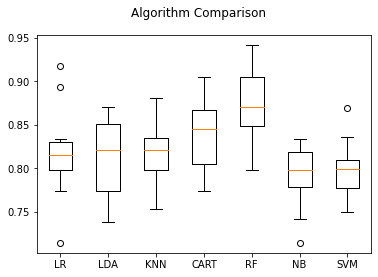

In [7]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Random Forest Classification

In [8]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x,y)

y_pred=clf.predict(x_test)

from sklearn import metrics

# y_test = y_test.map({'Non-sluggish': 0, 'Sluggish': 1}).astype(int)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8459715639810427


Text(0.5, 257.44, 'Predicted label')

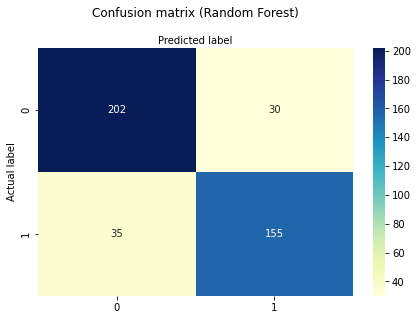

In [9]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (Random Forest)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

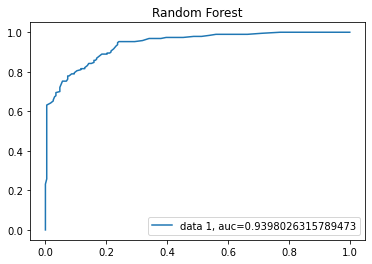

In [10]:
y_test = y_test.map({'Non-sluggish': 0, 'Sluggish': 1}).astype(int)
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Random Forest')
plt.legend(loc=4)
plt.show()

# Logistic Regression Classification

In [11]:
from sklearn.linear_model import LogisticRegression

y_test=df2['Status'] 
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=3000)

# fit the model with data
logreg.fit(x, y)

y_pred = logreg.predict(x_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8056872037914692


In [12]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[182,  50],
       [ 32, 158]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

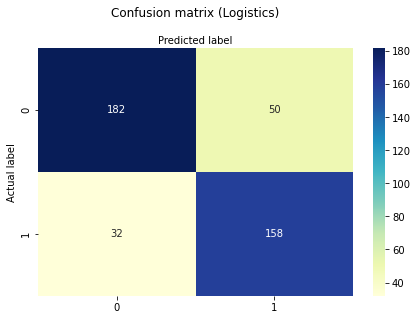

In [13]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (Logistics)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

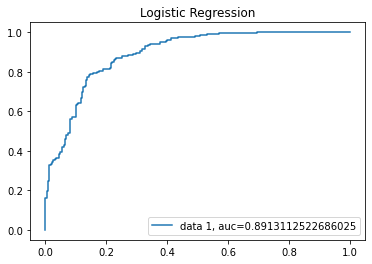

In [14]:
y_test = y_test.map({'Non-sluggish': 0, 'Sluggish': 1}).astype(int)
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Logistic Regression')
plt.legend(loc=4)
plt.show()

# Decision Tree Classification

In [15]:
from sklearn.tree import DecisionTreeClassifier

y_test=df2['Status'] 
#Create a Gaussian Classifier
clf = DecisionTreeClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x, y)

# prediction on test set
y_pred=clf.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# y_test = y_test.map({'Non-sluggish': 0, 'Sluggish': 1}).astype(int)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8246445497630331


Text(0.5, 257.44, 'Predicted label')

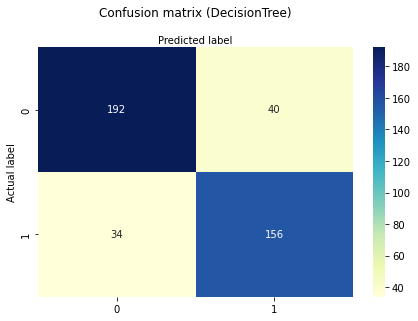

In [16]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (DecisionTree)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

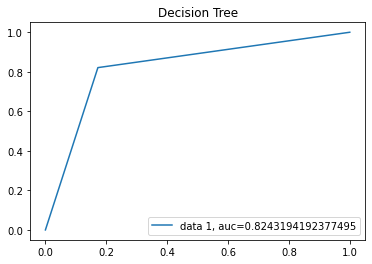

In [17]:
y_test = y_test.map({'Non-sluggish': 0, 'Sluggish': 1}).astype(int)
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Decision Tree')
plt.show()

# Catboost Classification Model

In [18]:
from catboost import CatBoostClassifier

y_test=df2['Status'] 
#cat_features = list(range(0, x.shape[1]))
#print(cat_features)

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(x, y, 
        #cat_features=cat_features, 
        eval_set=(x_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [19]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)

clf.fit(
    x, y,
    #cat_features=cat_features,
    eval_set=(x_test, y_test),
)

Learning rate set to 0.225144
0:	learn: 0.6060261	test: 0.6151466	best: 0.6151466 (0)	total: 1.07ms	remaining: 9.68ms
1:	learn: 0.5440133	test: 0.5585111	best: 0.5585111 (1)	total: 1.92ms	remaining: 7.68ms
2:	learn: 0.4976054	test: 0.5160737	best: 0.5160737 (2)	total: 2.75ms	remaining: 6.41ms
3:	learn: 0.4603993	test: 0.4831370	best: 0.4831370 (3)	total: 3.62ms	remaining: 5.43ms
4:	learn: 0.4267712	test: 0.4520713	best: 0.4520713 (4)	total: 4.42ms	remaining: 4.42ms
5:	learn: 0.4023261	test: 0.4316467	best: 0.4316467 (5)	total: 5.24ms	remaining: 3.49ms
6:	learn: 0.3857454	test: 0.4176460	best: 0.4176460 (6)	total: 6.16ms	remaining: 2.64ms
7:	learn: 0.3707636	test: 0.4058272	best: 0.4058272 (7)	total: 6.98ms	remaining: 1.74ms
8:	learn: 0.3566109	test: 0.3927115	best: 0.3927115 (8)	total: 7.76ms	remaining: 862us
9:	learn: 0.3417490	test: 0.3833353	best: 0.3833353 (9)	total: 8.55ms	remaining: 0us

bestTest = 0.3833353486
bestIteration = 9



In [20]:
y_pred = clf.predict(data=x_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8483412322274881


Text(0.5, 257.44, 'Predicted label')

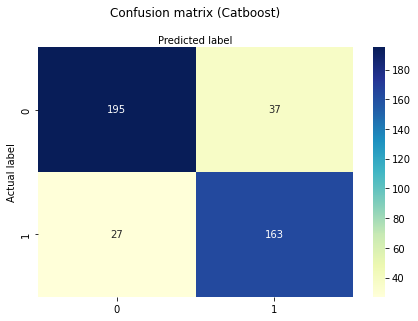

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix (Catboost)', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

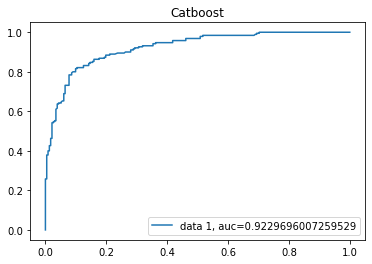

In [22]:
y_test = y_test.map({'Non-sluggish': 0, 'Sluggish': 1}).astype(int)
y_pred_proba = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('Catboost')
plt.legend(loc=4)
plt.show()

# Important Feature Analysis

In [28]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x,y)
y_test=df2['Status'] 
y_pred=clf.predict(x_test)
#value = clf.predict_proba(x_test)[:, 0] 
#print(value)

In [29]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8507109004739336


In [30]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=['OilRate (STB/D)', 'WaterRate (STB/D)','GasLiftRate (MSCF/D)', 'GasRate (MSCF/D)', 'LiquidRate (STB/D)', 'WCUT (%)', 'GLR (SCF/STB)','FWHP (Psi)', 'Tubing ID (Inch)', 'FWHT (DegC)']).sort_values(ascending=False)
feature_imp


GasRate (MSCF/D)        0.189889
GasLiftRate (MSCF/D)    0.137222
GLR (SCF/STB)           0.128924
FWHP (Psi)              0.126255
LiquidRate (STB/D)      0.102047
WaterRate (STB/D)       0.089787
WCUT (%)                0.085663
OilRate (STB/D)         0.077996
FWHT (DegC)             0.060162
Tubing ID (Inch)        0.002056
dtype: float64

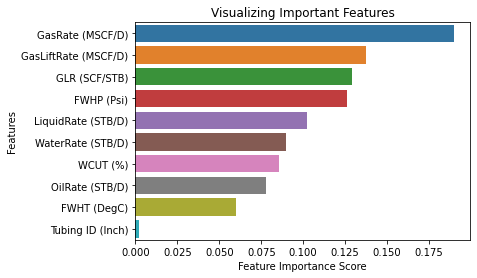

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

<AxesSubplot:title={'center':'Correlation Heat Map'}>

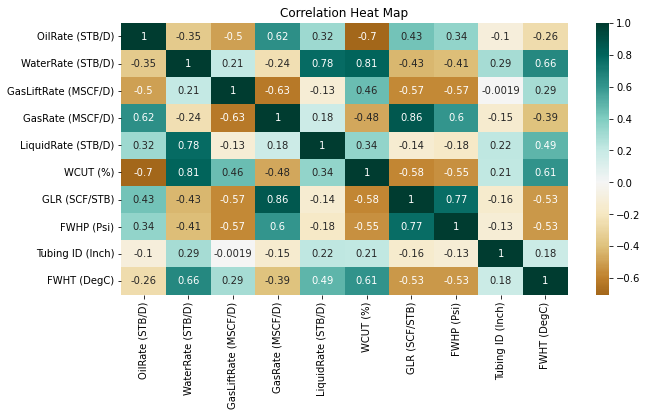

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Dataset/train_well_data.csv')
x = df[['OilRate (STB/D)', 'WaterRate (STB/D)','GasLiftRate (MSCF/D)', 'GasRate (MSCF/D)', 'LiquidRate (STB/D)', 'WCUT (%)', 'GLR (SCF/STB)','FWHP (Psi)', 'Tubing ID (Inch)', 'FWHT (DegC)']]

corr_matrix=x.corr()
 
#Creating a seaborn heatmap
plt.figure(1, figsize=(10,5))
plt.title('Correlation Heat Map')
sns.heatmap(corr_matrix, cmap='BrBG', center=0, annot=True)

# Pickle File Production

In [28]:
import pickle
with open('ModelArchive/model_pkl', 'wb') as files:
    pickle.dump(model, files)